<a href="https://colab.research.google.com/github/2403a52029-lab/ML_Assignments/blob/main/ML_LAB_08_2403A52029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("/content/CO2 Emissions_Canada.csv")

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = df['CO2 Emissions(g/km)']

X.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)

print("Linear Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))

Linear Regression Results
MSE: 421.92233190519977
R2 Score: 0.8773348735033225


In [10]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression Results
MSE: 421.9906734651132
R2 Score: 0.8773150046187961


In [11]:
ridge = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_

print("Best Alpha:", grid.best_params_)

Best Alpha: {'alpha': 10}


In [12]:
y_pred_ridge = best_ridge.predict(X_test_scaled)

print("Ridge Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression Results
MSE: 421.94896543141095
R2 Score: 0.8773271303605337


In [13]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ]
})

results

,Model,MSE,R2 Score
0,Linear Regression,421.922332,0.877335
1,Lasso,421.990673,0.877315
2,Ridge,421.948965,0.877327


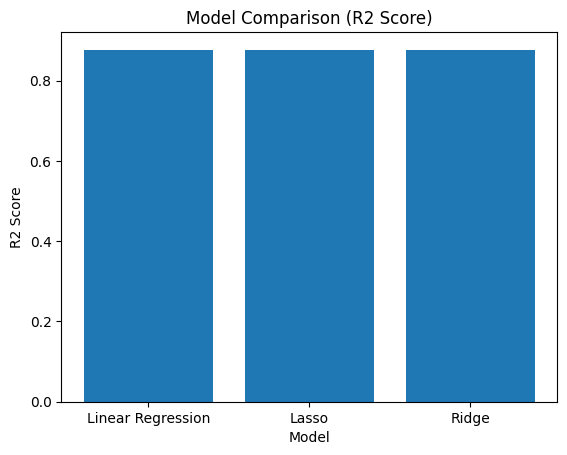

In [14]:
plt.figure()
plt.bar(results["Model"], results["R2 Score"])
plt.title("Model Comparison (R2 Score)")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()